MarTech Python -03 The Driving Factors behind Marketing Engagement Rate-Regression 

Analysis 行銷參與率背後的驅動因素 - 線性回歸分析

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt   #讓資料可視化
import pandas as pd

4.0 Load data 載入資料


In [ ]:
df = pd.read_csv('/bin/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv', sep=',')
# shape() function --> 查探陣列維數
df.shape

(9134, 24)

In [ ]:
df.shape

(9134, 24)

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.head( n = 10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,FV70604,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [ ]:
df.describe(include=[object])

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,FV70604,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [ ]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [ ]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

5.0 Convert Yes/No in response to 1/0 and add the result to df with the field name Engaged

In [ ]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
df[["Response","Engaged"]]

,Response,Engaged
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0
...,...,...
9129,No,0
9130,Yes,1
9131,No,0
9132,No,0


In [ ]:
df.tail()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,0
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,0
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize,0


6.0 Compute and draw the histogram of x.

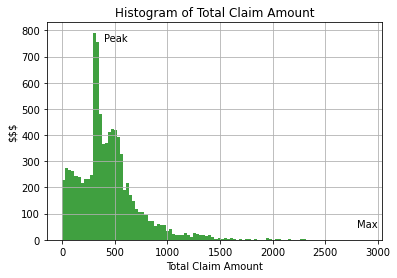

In [ ]:
n, bins, patches = plt.hist(df['Total Claim Amount'],100, facecolor='g', alpha=0.75)

plt.xlabel('Total Claim Amount')
plt.ylabel('$$$')
plt.title('Histogram of Total Claim Amount')
plt.text(400,760, r'Peak')
# plt.text(400,700, r'$\mu=100,\ \sigma=15$')
plt.text(2800,50, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

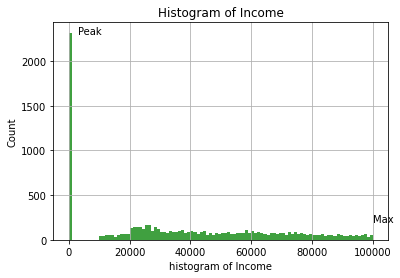

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,TF56202,California,5032.165498,No,Basic,College,2/12/11,Employed,M,66367,Suburban,Divorced,64,6,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small,0
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,0
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,0
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,1


In [ ]:
n, bins, patches = plt.hist(df['Income'],100, facecolor='g', alpha=0.75)

plt.xlabel('histogram of Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.text(3000,2300, r'Peak')
plt.text(100000,200, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

df['Income'] > 0

df[df['Income'] > 0]

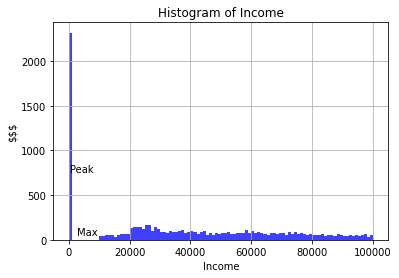

In [ ]:
# Compute and draw the histogram of 'Total Claim Amount'. 
#mu, sigma = 100, 15
#x = mu + sigma * np.random.randn(10000)

# the histogram of the data
#n, bins, patches = plt.hist(df['Total Claim Amount']  , 50, density=True, facecolor='g', alpha=0.75)
n, bins, patches = plt.hist(df['Income'],100, facecolor='b', alpha=0.75)

plt.xlabel('Income')
plt.ylabel('$$$')
plt.title('Histogram of Income')
plt.text(400,760, r'Peak')
# plt.text(400,700, r'$\mu=100,\ \sigma=15$')
plt.text(2800,50, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

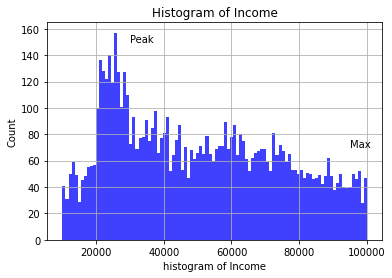

In [ ]:
dfIncome = df[df['Income'] > 0]
n, bins, patches = plt.hist( dfIncome['Income'],100, facecolor='b', alpha=0.75)

plt.xlabel('histogram of Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.text(30000,150, r'Peak')
plt.text(95000,70, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

Homework 01 Compute and draw histogram of numeral variables

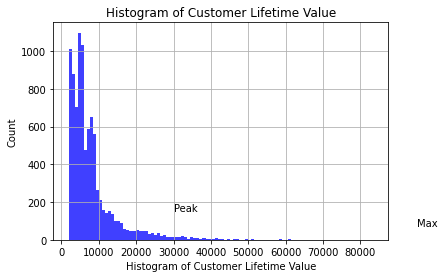

In [ ]:
# Compute and draw the histogram of 'Customer Lifetime Value'.
# the histogram of the data
dfCLV = df[df['Customer Lifetime Value'] > 0]
n, bins, pathes = plt.hist( dfCLV['Customer Lifetime Value'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Customer Lifetime Value')
plt.ylabel('Count')
plt.title('Histogram of Customer Lifetime Value')
plt.text(30000,150, r'Peak')
plt.text(95000,70, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

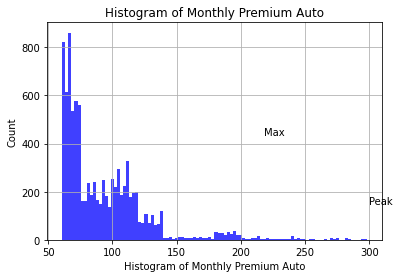

In [ ]:
# Compute and draw the histogram of 'Monthly Premium Autos'.
# the histogram of the data
dfCLV = df[df['Monthly Premium Auto'] > 0]
n, bins, pathes = plt.hist( dfCLV['Monthly Premium Auto'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Monthly Premium Auto')
plt.ylabel('Count')
plt.title('Histogram of Monthly Premium Auto')
plt.text(300,150, r'Peak')
plt.text(218,436, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

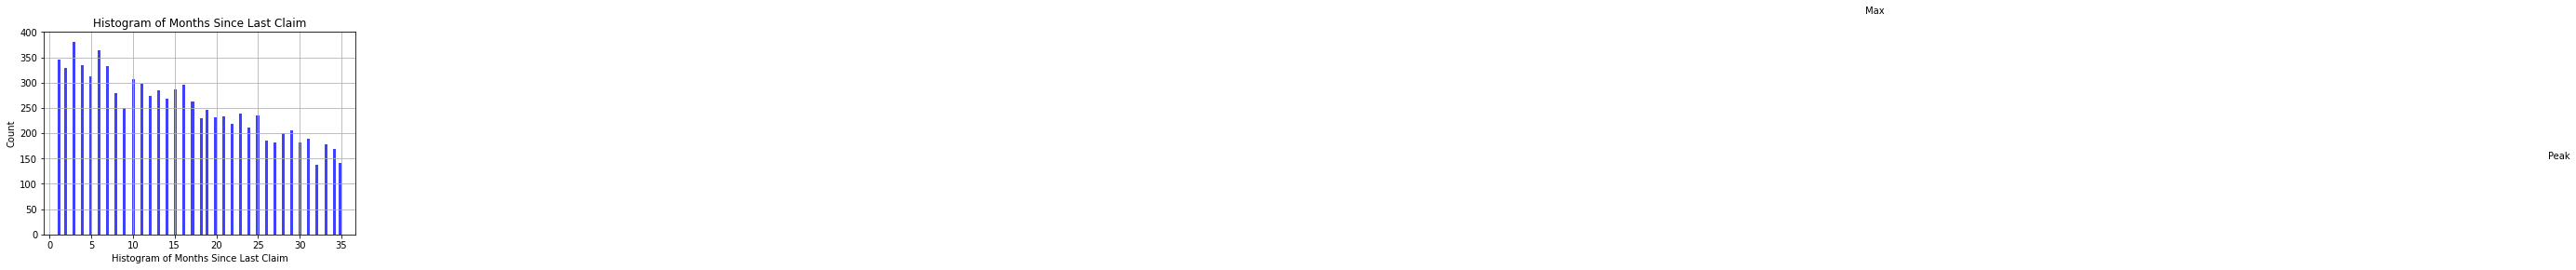

In [ ]:
# Compute and draw the histogram of 'Months Since Last Claim'.
# the histogram of the data
dfCLV = df[df['Months Since Last Claim'] > 0]
n, bins, pathes = plt.hist( dfCLV['Months Since Last Claim'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Months Since Last Claim')
plt.ylabel('Count')
plt.title('Histogram of Months Since Last Claim')
plt.text(300,150, r'Peak')
plt.text(218,436, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

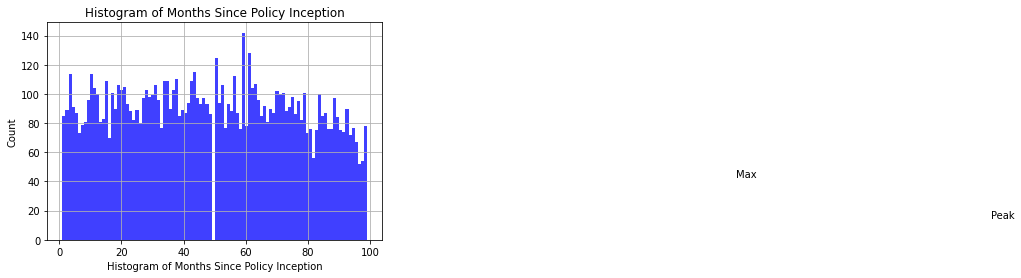

In [ ]:
# Compute and draw the histogram of 'Months Since Policy Inception'.
# the histogram of the data
dfCLV = df[df['Months Since Policy Inception'] > 0]
n, bins, pathes = plt.hist( dfCLV['Months Since Policy Inception'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Months Since Policy Inception')
plt.ylabel('Count')
plt.title('Histogram of Months Since Policy Inception')
plt.text(300,15, r'Peak')
plt.text(218,43, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

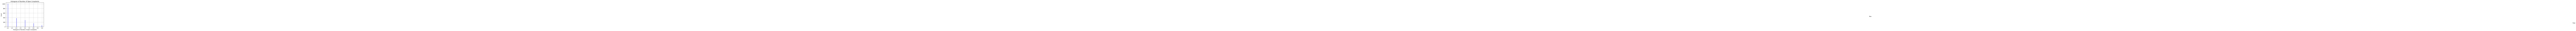

In [ ]:
# Compute and draw the histogram of 'Number of Open Complaints'.
# the histogram of the data
dfCLV = df[df['Number of Open Complaints'] > 0]
n, bins, pathes = plt.hist( dfCLV['Number of Open Complaints'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Number of Open Complaints')
plt.ylabel('Count')
plt.title('Histogram of Number of Open Complaints')
plt.text(300,150, r'Peak')
plt.text(218,436, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

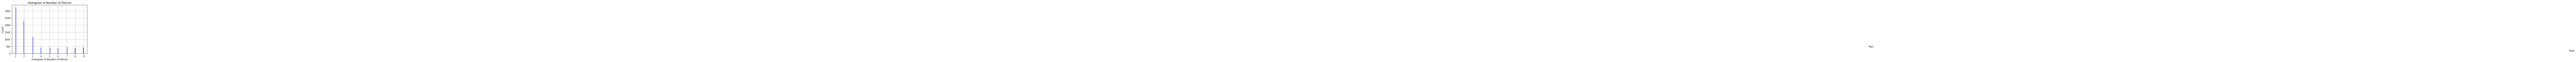

In [ ]:
# Compute and draw the histogram of 'Number of Policies'.
# the histogram of the data
dfCLV = df[df['Number of Policies'] > 0]
n, bins, pathes = plt.hist( dfCLV['Number of Policies'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Number of Policies')
plt.ylabel('Count')
plt.title('Histogram of Number of Policies')
plt.text(300,150, r'Peak')
plt.text(218,436, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

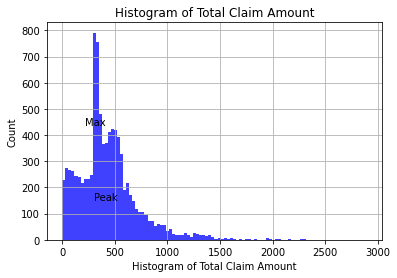

In [ ]:
# Compute and draw the histogram of 'Total Claim Amount'.
# the histogram of the data
dfCLV = df[df['Total Claim Amount'] > 0]
n, bins, pathes = plt.hist( dfCLV['Total Claim Amount'],100, facecolor='b', alpha=0.75)

plt.xlabel('Histogram of Total Claim Amount')
plt.ylabel('Count')
plt.title('Histogram of Total Claim Amount')
plt.text(300,150, r'Peak')
plt.text(218,436, r'Max')
plt.xlim()
plt.ylim()
plt.grid(True)
plt.show()

7.0 Data Analysis 資料分析

In [ ]:
list(df.columns)

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Engaged']

8.0 Engagement Rate 參與率

In [ ]:
df.Engaged

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, Length: 9134, dtype: int64

In [ ]:
df.shape

(9134, 25)

In [ ]:
df.shape[0]

9134

In [ ]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)


In [ ]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


pivot table 樞紐分析表

In [ ]:
df[['Renew Offer Type','Engaged','Response']].head(10)

,Renew Offer Type,Engaged,Response
0,Offer1,0,No
1,Offer3,0,No
2,Offer1,0,No
3,Offer1,0,No
4,Offer1,0,No
5,Offer2,1,Yes
6,Offer1,1,Yes
7,Offer1,0,No
8,Offer1,1,Yes
9,Offer2,0,No


In [ ]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len
).fillna(0.0)
engagement_by_offer_type_df

Engaged,0,1
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


In [ ]:
engagement_by_Engaged_df = pd.pivot_table(
    df, values='Response', index='Engaged', columns='Renew Offer Type', aggfunc=len
).fillna(0.0)
engagement_by_Engaged_df

Renew Offer Type,Offer1,Offer2,Offer3,Offer4
Engaged,,,,
0,3158.0,2242.0,1402.0,1024.0
1,594.0,684.0,30.0,0.0


In [ ]:
engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


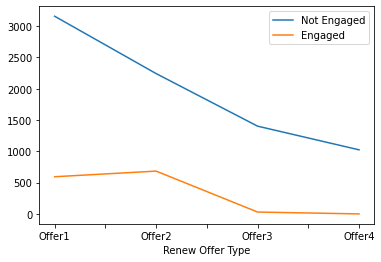

In [ ]:
engagement_by_offer_type_df.plot()

In [ ]:
Offer1 = pd.DataFrame(
    df.groupby('Renew Offer Type').count()['Engaged'] 
)
Offer1

,Engaged
Renew Offer Type,
Offer1,3752
Offer2,2926
Offer3,1432
Offer4,1024


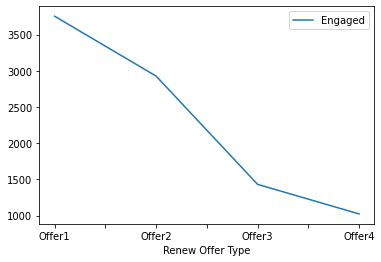

In [ ]:
Offer1.plot()

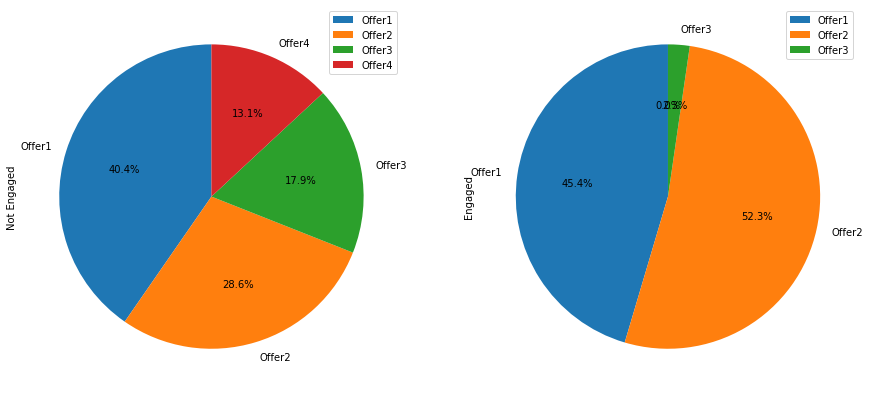

In [ ]:
engagement_by_offer_type_df.plot(
    kind='pie',        
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x # % 屬於跳脫字元 需用特殊方式印出
    #autopct='%.1f%%'
)
plt.show()

By Sales Channel 銷售渠道

In [ ]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


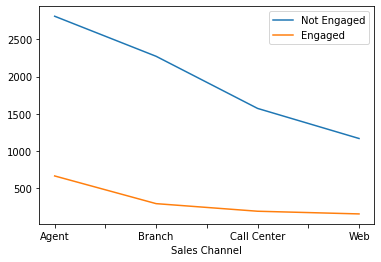

In [ ]:
engagement_by_sales_channel_df.plot()

In [ ]:
test2 = pd.DataFrame(
    df.groupby('Sales Channel').count()['Engaged'] 
)
test2

,Engaged
Sales Channel,
Agent,3477
Branch,2567
Call Center,1765
Web,1325


In [ ]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


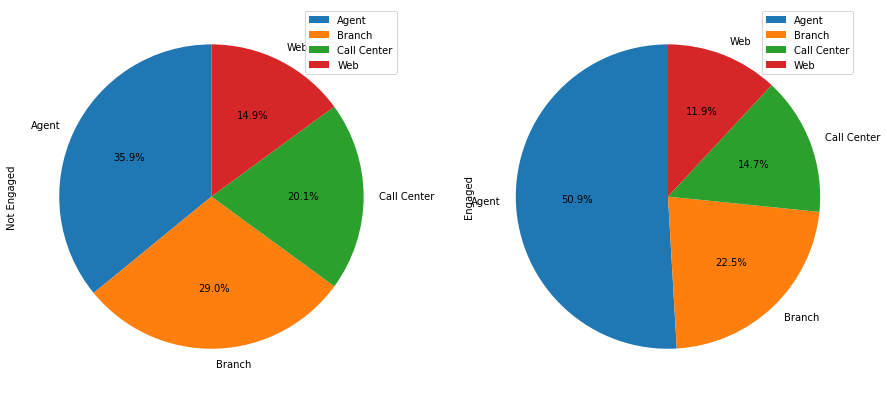

In [ ]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

Total Claim Amount Distributions 索賠總額

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


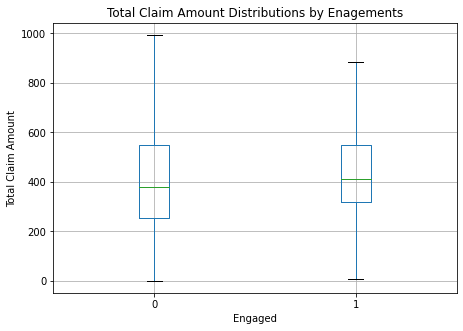

In [ ]:
#boxplot(箱型圖)
'''
最大值 最小值 平均值 上四分位數(Q1) 下四分衛數(Q3) 離群值(fliers)
'''
'''
https://www.itread01.com/content/1548231665.html
'''
'''
showfliers :
是否顯示離群值
'''
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


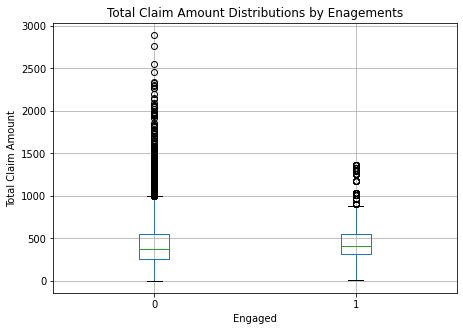

In [ ]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,  # show 離群值
    figsize=(7,5) 
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

Income Distributions 收入分布

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


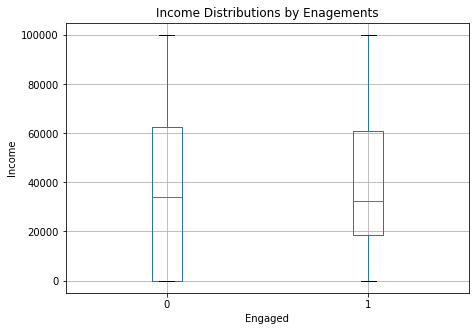

In [ ]:
ax = df[['Engaged', 'Income']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Income')
ax.set_title('Income Distributions by Enagements')

plt.suptitle("")
plt.show()

In [ ]:
df.groupby('Engaged').describe()['Income'].T #T屬性轉置資料框

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


3. Regression Analysis with Continuous Variables Only 以連續變數擬合邏輯回歸模型

In [ ]:
import statsmodels.api as sm  
#導入錯誤模組import statsmodels.formula.api as sm

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [ ]:
# dtype --> 獲取資料型態  ex:int64表示64位元的整數
#https://www.runoob.com/numpy/numpy-dtype.html

df['Income'].dtype


dtype('int64')

In [ ]:
df['Customer Lifetime Value'].dtype

dtype('float64')

In [ ]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Engaged         

In [ ]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]
continuous_vars

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [ ]:
#輸出變數 --> Engaged  輸入變數 --> continuous_vars
logit = sm.Logit(
    df['Engaged'], df[continuous_vars]
)
#logit.fit() -->訓練回歸模型經過訓練的模型將會習得最佳解對輸出和輸入變數作出最佳預測。

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [ ]:
logit_fit

In [ ]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Jun 2021   Pseudo R-squ.:                -0.02546
Time:                        18:00:41   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

In [ ]:
print(logit_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Jun 2021   Pseudo R-squ.:                -0.02546
Time:                        18:00:42   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006 

4. Regression Analysis with Categorical Variables 以類別變數擬合邏輯回歸模型(需自學)